# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv("D:/Dataset/train.csv")

In [3]:
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [4]:
df.shape # We Have 12 11 Features and one y label

(1000, 12)

In [5]:
df.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


<Axes: >

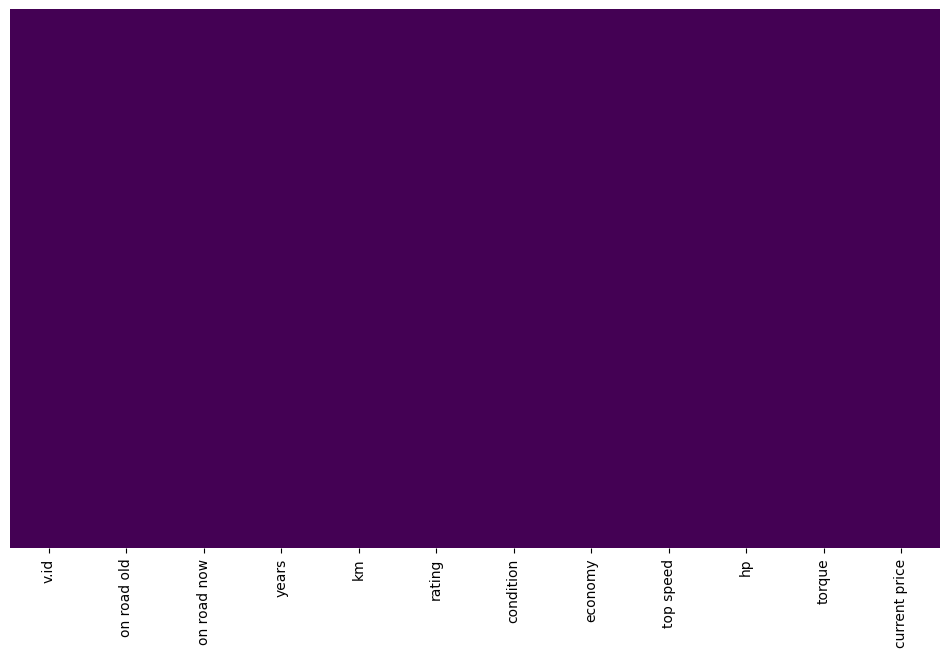

In [6]:
# Checking for any missing values in the dataset
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False, yticklabels=False)

<Axes: >

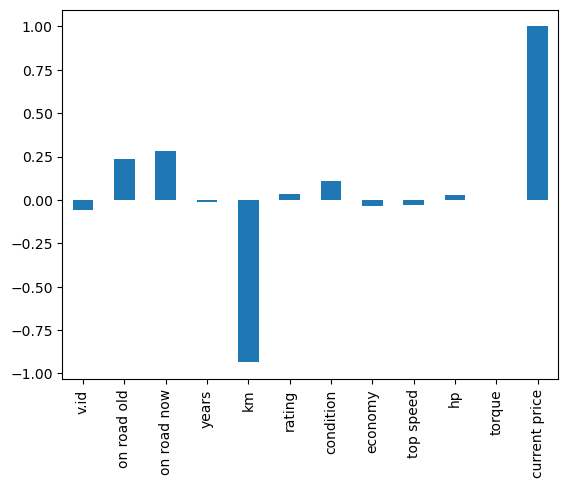

In [8]:
# Finding correlation between the features and y label
df.corr()['current price'].plot(kind='bar')

<Figure size 1200x700 with 0 Axes>

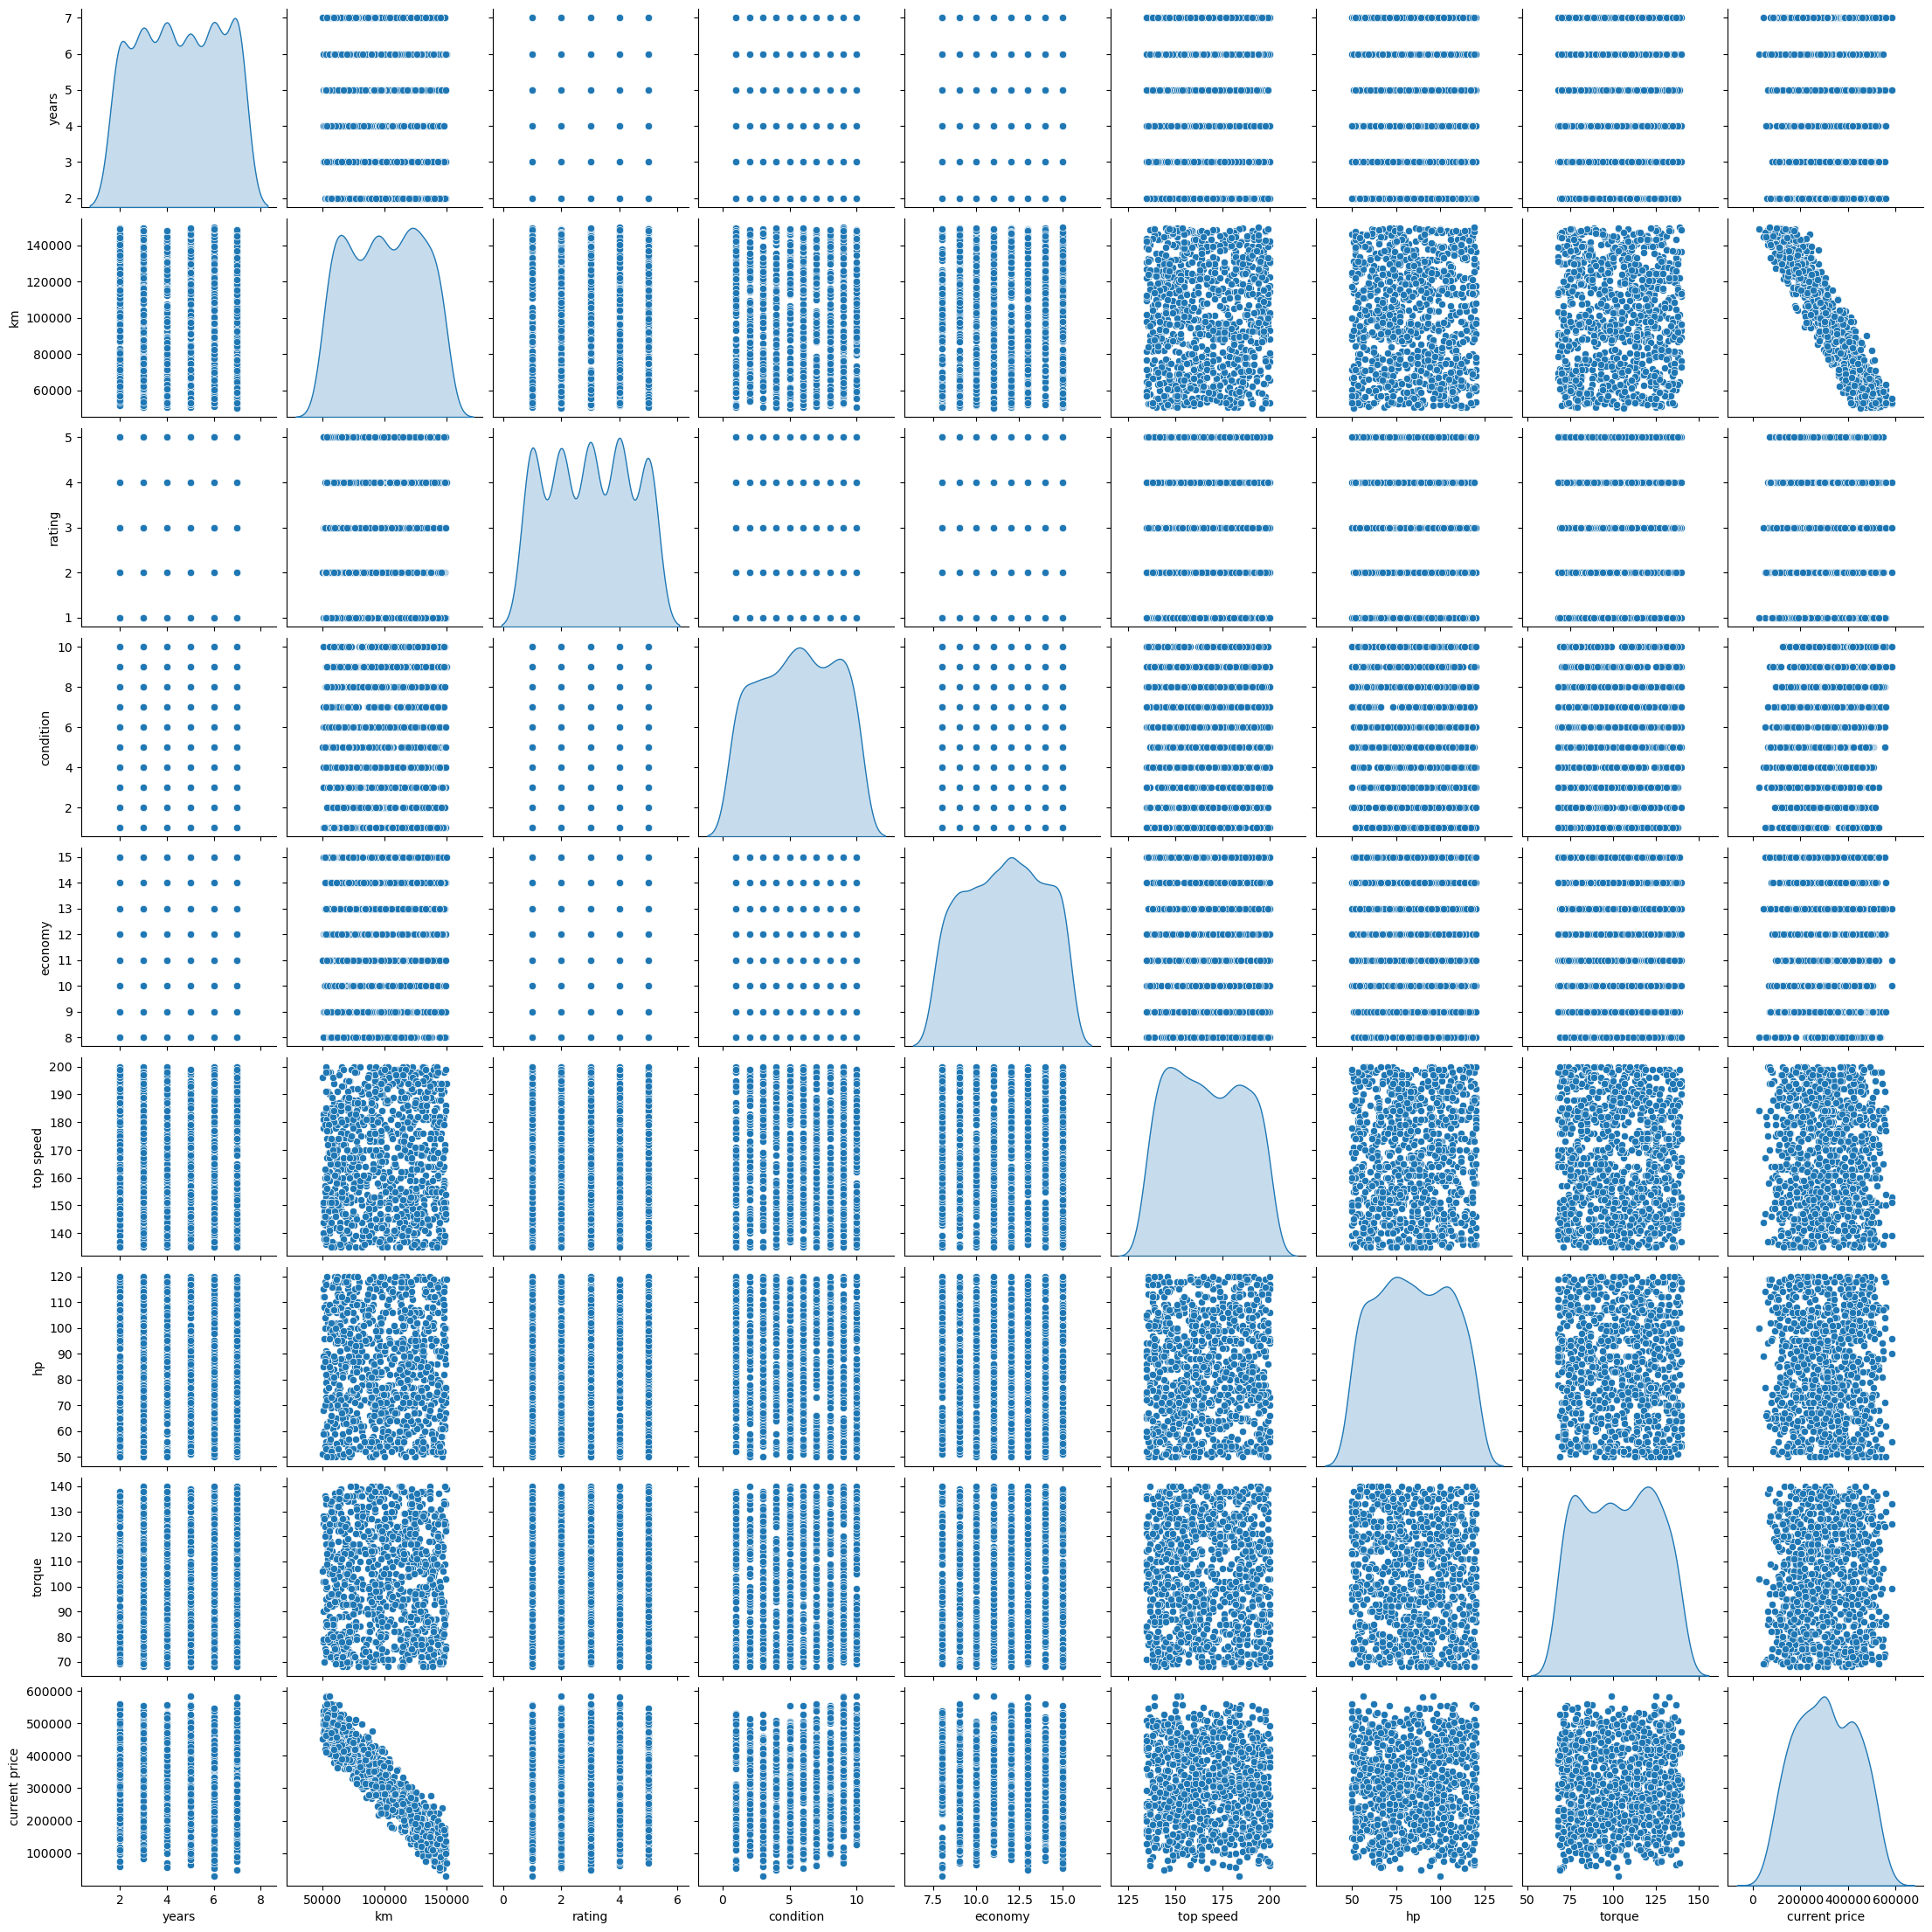

In [9]:
# Getting Overview of dataset
plt.figure(figsize=(12,7))
sns.pairplot(df[['years','km','rating','condition','economy','top speed','hp','torque','current price']],diag_kind='kde')

In [10]:
tensor_data = tf.constant(df)
tensor_data = tf.cast(tensor_data, dtype=tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


**Data Preparation**

In [31]:
X = tensor_data[:,3:-1]
print(X.shape)

(1000, 8)


In [32]:
y = tensor_data[:,-1]
y = tf.expand_dims(y,axis=-1)
print(y.shape)

(1000, 1)


In [50]:
TRAIN_R = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [53]:
X_train = X[:int(DATASET_SIZE*TRAIN_R)]
y_train = y[:int(DATASET_SIZE*TRAIN_R)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [56]:
X_val = X[int(DATASET_SIZE*TRAIN_R):int(DATASET_SIZE*(TRAIN_R+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_R):int(DATASET_SIZE*(TRAIN_R+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [58]:
X_test = X[int(DATASET_SIZE*(TRAIN_R+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_R+VAL_RATIO)):]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


**Normalization/Scaling of data**

In [13]:
from tensorflow.keras.layers import Normalization

In [14]:
# Example
normalizer = Normalization(axis=-1,mean=5,variance=4)
x_normalized = tf.constant([[3,4,5,6,7],
                           [4,5,6,7,8]])
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5]], dtype=float32)>

# Creating the model

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [97]:
model = Sequential()
model.add(InputLayer(input_shape=(8,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1))


model.compile(loss=MeanSquaredError(),optimizer=Adam(lr=1),metrics=RootMeanSquaredError())

In [98]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               1152      
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 1)                 129       
                                                                 
Total params: 34305 (134.00 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
#tf.keras.utils.plot_model(model, to_file = 'model.png',show_shapes=True)

In [100]:
model.fit(X,y,epochs=100,verbose=1,validation_data=(X_val,y_val))

Epoch 1/100
32/32 [==============================] - 2s 13ms/step - loss: 70607478784.0000 - root_mean_squared_error: 265720.6875 - val_loss: 43459067904.0000 - val_root_mean_squared_error: 208468.3906
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 42747346944.0000 - root_mean_squared_error: 206754.3125 - val_loss: 36141322240.0000 - val_root_mean_squared_error: 190108.7188
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 41721806848.0000 - root_mean_squared_error: 204259.1719 - val_loss: 37688115200.0000 - val_root_mean_squared_error: 194134.2656
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 41712398336.0000 - root_mean_squared_error: 204236.1406 - val_loss: 36585435136.0000 - val_root_mean_squared_error: 191273.1875
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 41578524672.0000 - root_mean_squared_error: 203908.1250 - val_loss: 40557137920.0000 - val_root_mean_squared_error: 201388

<Axes: >

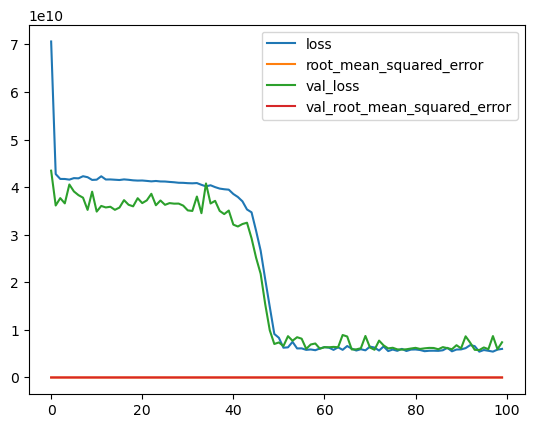

In [101]:
data = pd.DataFrame(model.history.history)
data.plot()

In [102]:
model.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 6328861184.0000 - root_mean_squared_error: 79554.1406


[6328861184.0, 79554.140625]

In [103]:
X_test.shape
tf.expand_dims(X_test[0],axis=0)

<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[7.00000e+00, 1.36786e+05, 5.00000e+00, 5.00000e+00, 9.00000e+00,
        1.74000e+02, 6.80000e+01, 1.35000e+02]], dtype=float32)>

In [104]:
model.predict(tf.expand_dims(X_test[0],axis=0))

1/1 [==============================] - 0s 126ms/step


array([[244067.39]], dtype=float32)

In [105]:
y_true = list(y_test[:,0].numpy())

In [106]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

4/4 [==============================] - 0s 3ms/step
[244067.42, 381983.28, 176836.11, 203675.31, 363857.2, 177107.9, 321648.16, 337206.62, 365469.2, 360342.7, 477154.75, 287531.12, 290082.56, 184581.03, 283448.62, 371058.56, 338460.34, 355108.94, 199208.31, 313266.5, 185067.39, 506160.56, 177275.17, 301632.06, 498806.47, 340802.3, 433488.84, 331714.06, 456140.72, 340218.62, 251299.56, 256539.36, 250146.05, 230377.11, 238439.39, 427775.53, 256040.06, 349010.66, 447930.62, 325278.88, 483088.25, 176484.86, 289032.6, 350274.62, 531104.06, 349683.47, 406778.72, 447468.66, 371345.47, 231959.3, 434254.06, 257912.83, 425593.62, 381227.97, 270365.25, 321836.44, 197674.53, 182103.52, 214748.2, 299882.56, 323061.22, 460533.94, 423783.5, 549178.75, 210474.64, 273451.38, 228493.23, 375406.66, 501285.8, 346522.38, 286892.5, 281414.97, 223270.84, 428512.3, 211392.92, 418056.4, 188725.52, 516639.0, 413958.5, 209443.84, 206195.3, 325859.56, 444983.7, 410104.2, 318497.5, 393007.7, 289269.75, 428871.06, 4

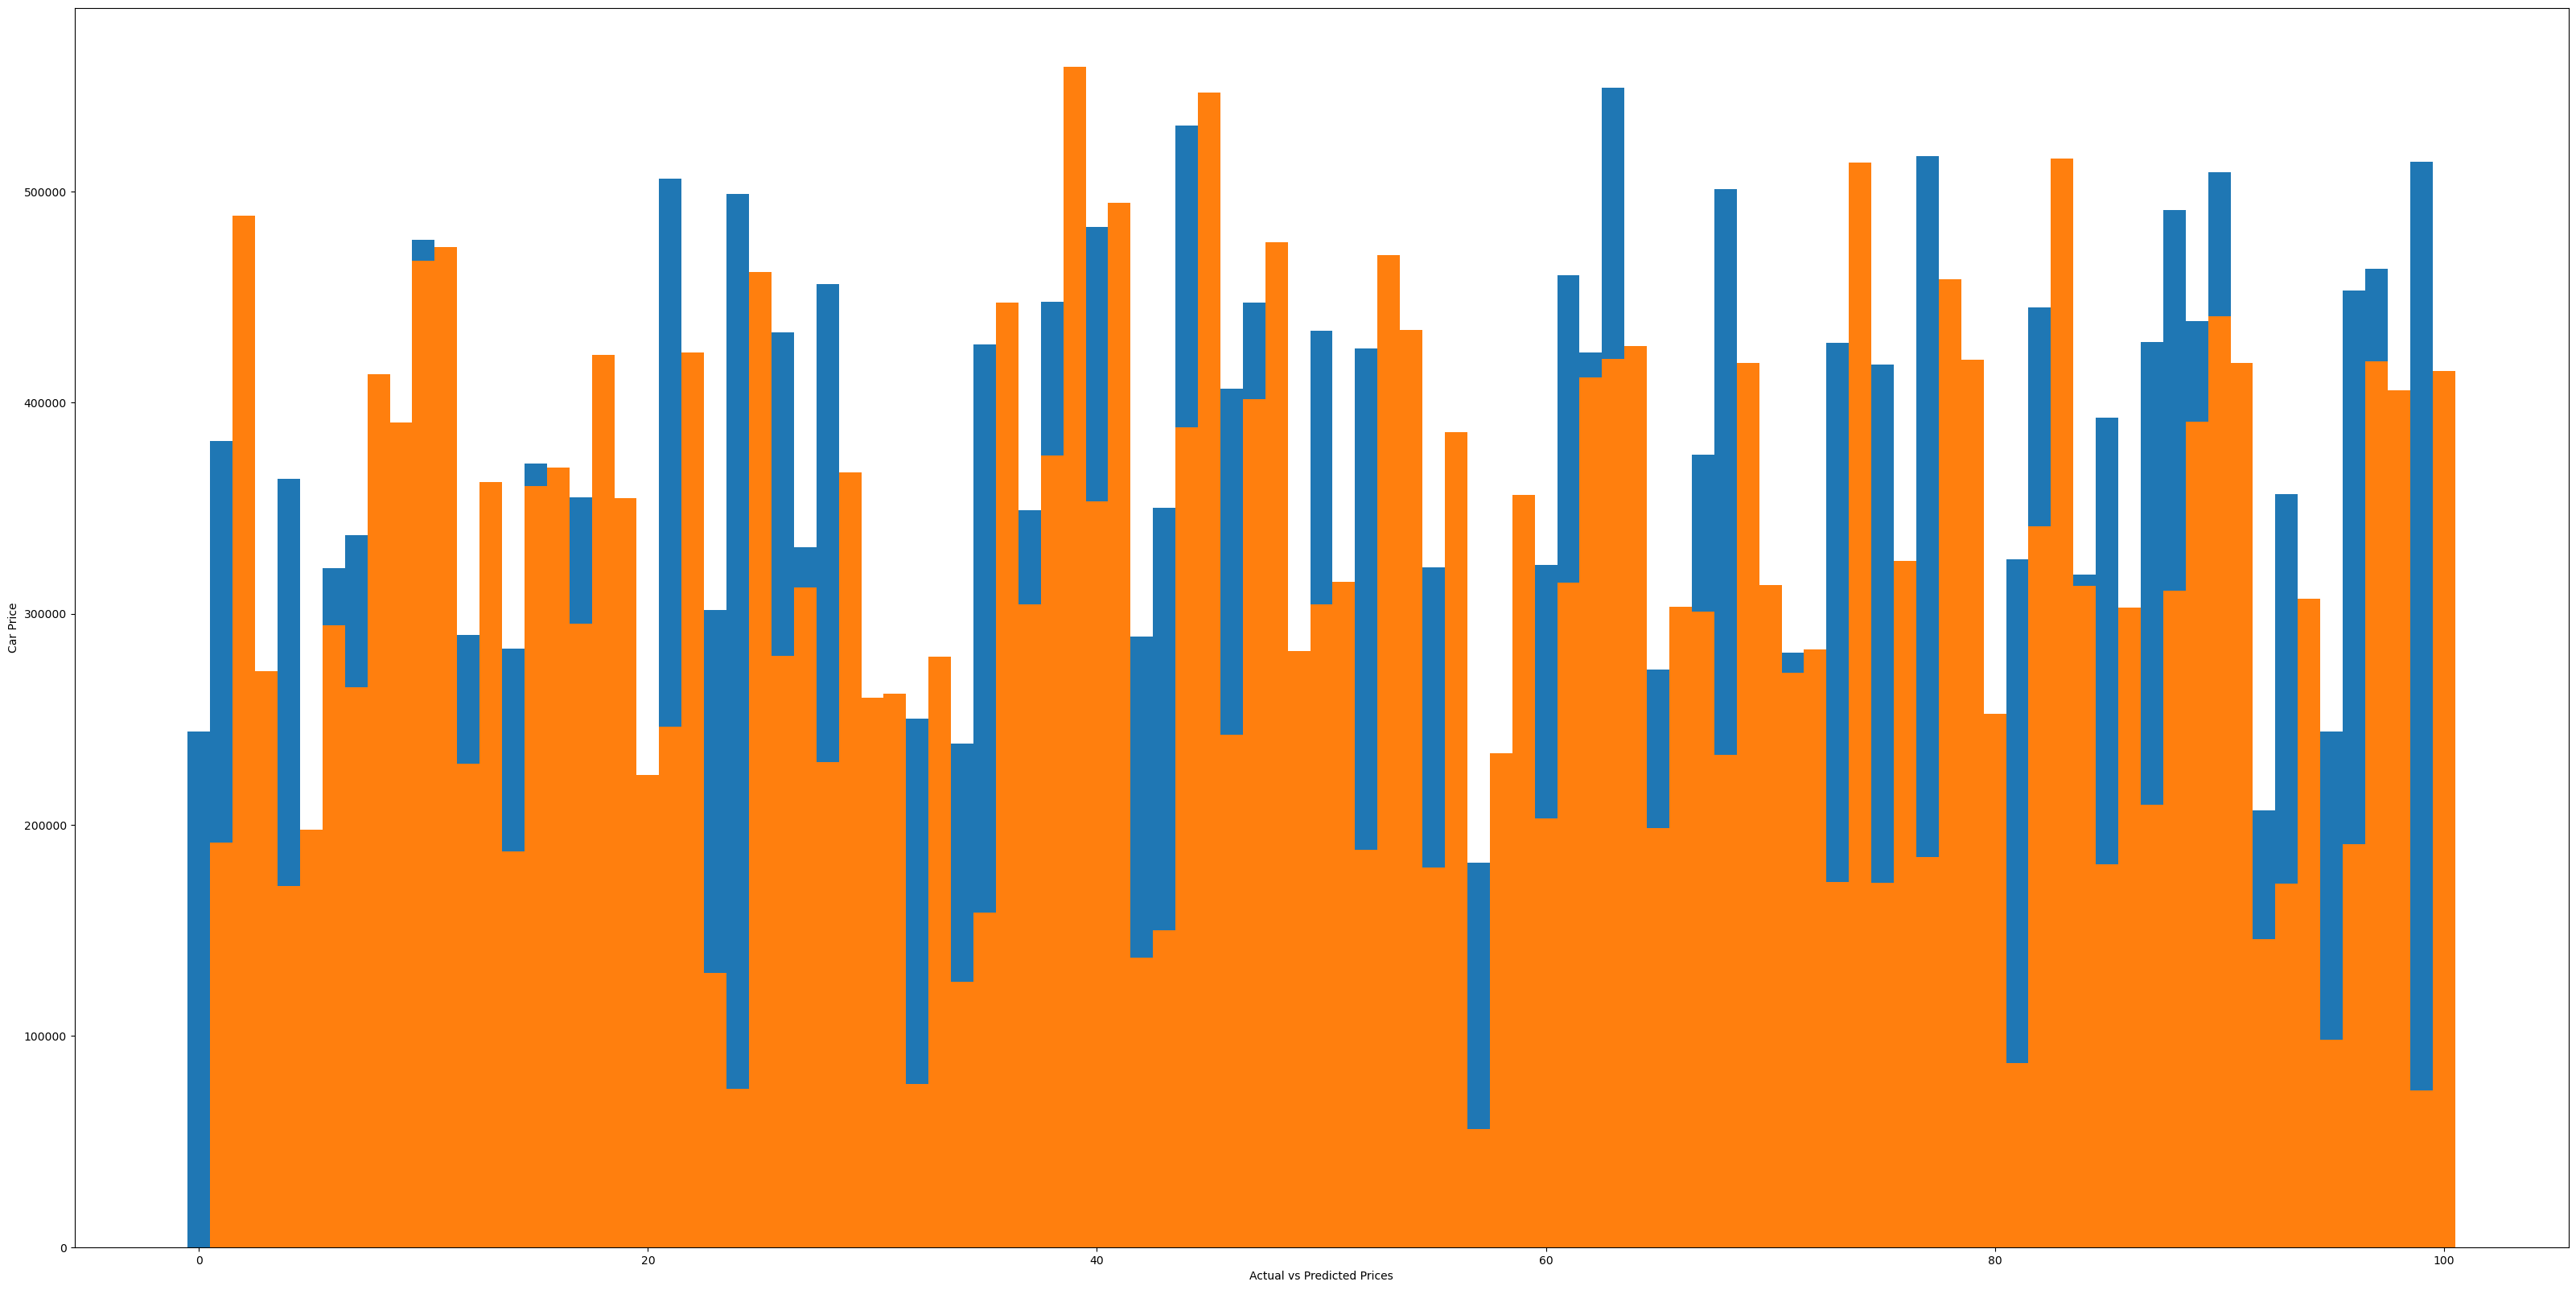

In [107]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price')

plt.show()